<a href="https://colab.research.google.com/github/joaochenriques/AERO1_2021_2022/blob/main/Joukowski_Transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from numpy import *
import matplotlib.pyplot as mpl
from IPython.display import display, Math
%config InlineBackend.figure_formats = ['svg']
mpl.style.use('classic')
VFont=16
mpl.rcParams['figure.facecolor'] = '1.0'
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
mpl.rcParams['font.sans-serif'] = 'stix'
mpl.rcParams['axes.titlesize'] = VFont*1.1
mpl.rcParams['axes.labelsize'] = VFont
mpl.rcParams['xtick.labelsize'] = VFont*0.9
mpl.rcParams['ytick.labelsize'] = VFont*0.9
mpl.rcParams['legend.fontsize'] = VFont*0.9
mpl.rcParams['axes.formatter.useoffset'] = False

In [2]:
ii = 1J
𝜋 = pi
n = 100 # points per side
θ = linspace( 0, 2*𝜋, 2*n-1 )

In [3]:

def draw_grid():
  mpl.axis('equal')
  mpl.axhline(y= 0,lw=1,dashes=(5,2),color='0.5')
  mpl.axvline(x= 0,lw=1,dashes=(5,2),color='0.5')
  mpl.axvline(x= 1,lw=1,dashes=(5,2),color='0.5')
  mpl.axvline(x=-1,lw=1,dashes=(5,2),color='0.5')
  mpl.axvline(x=-2,lw=1,dashes=(5,2),color='0.5')
  mpl.axvline(x= 2,lw=1,dashes=(5,2),color='0.5')

def deg2rad( a ):
  return a * 𝜋 / 180.0

## **Joukowsky airfoil geometry** 

$\Delta r$ - displacement in the real axis

$\Delta i$ - displacement in the imag axis

$a$ - circle radius

$c$ - circle center

$\zeta$ - circle coordinates in the $(\xi,\eta)$ plane

$z$ - Joukowsky airfoil coordinates in the $(x,y)$ plane

(4.00909090909091, 1.0511898020814319)

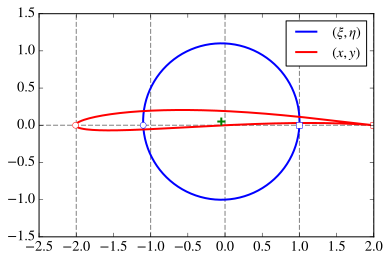

In [4]:
# Δr and Δi based on the linearized Joukowski profile equation
# t_over_l = 0.12
# h_over_l = 0.04

# Δr = -4.0/(3*sqrt(3.0))* t_over_l
# Δi =  2.0*h_over_l

Δr = -0.05
Δi =  0.05

R = sqrt( (1.0-Δr)**2 + Δi**2 )
c = complex( Δr, Δi )
ζ = R * exp( ii*θ ) + c
zs = ζ + 1.0 / ζ

draw_grid()

mpl.plot( real(ζ), imag(ζ),'b', lw=2., label=r'$(\xi,\eta)$')
mpl.plot( real(zs), imag(zs),'r', lw=2., label=r'$(x,y)$')

# LE and TE points
ζe = array( ( complex(-1+2*Δr,0), complex(1,0) ) )
ze = ζe + 1.0 / ζe
mpl.plot( real(ζe[0]), imag(ζe[0]),'bo', fillstyle='none', markersize=6, markerfacecolor='w')
mpl.plot( real(ze[0]), imag(ze[0]),'ro', fillstyle='none', markersize=6, markerfacecolor='w')
mpl.plot( real(ζe[1]), imag(ζe[1]),'bs', fillstyle='none', markersize=6, markerfacecolor='w')
mpl.plot( real(ze[1]), imag(ze[1]),'rs', fillstyle='none', markersize=6, markerfacecolor='w')
# circle center
mpl.plot( real(c), imag(c),'g+', markersize=8, markeredgewidth=2)

mpl.legend();
mpl.savefig( 'airfoil_section.svg' )

airfoil = copy(zs)
chord = real( ze[1]-ze[0] )
chord, R

## **Joukowsky airfoil streamlines**

<IPython.core.display.Math object>

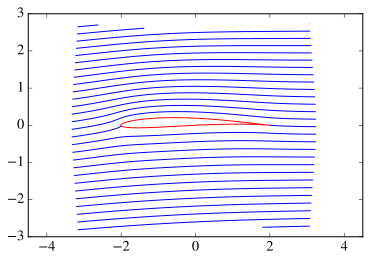

In [5]:
α = deg2rad( 3.0 )
β = arctan( Δi / (1.0-Δr) )

Γ = 4.0 * 𝜋 * R * sin( α + β )

x = arange(-3.0, 3.0, 0.1 )
y = arange(-3.0, 3.0, 0.1 )
x,y = meshgrid(x,y)
z = x + y*ii
z = ma.masked_where( absolute( z - c ) <= R, z )
zmc = z - c

# log does has a bug with masked arrays
# evaluate each entry
ll = zeros( zmc.shape, dtype=complex )
with errstate(divide='ignore'):
  for k, zmc_k in ndenumerate( zmc ):
      ll[k] = log( ( zmc_k / R ) * exp( -ii*α ) )

WZ = zmc * exp( -ii*α ) + R**2 / zmc * exp( ii*α ) + Γ*ii / (2*𝜋) * ll
J = z + 1.0 / z 

levels = arange(-5.8, 5.8, 0.2).tolist()

mpl.figure()
mpl.contour( J.real, J.imag, WZ.imag, levels=levels, colors='blue', linewidths=1, linestyles='solid')

mpl.plot(airfoil.real, airfoil.imag, 'r-')
mpl.axis('equal')

Cl = 2*Γ / chord

mpl.savefig( 'linhas_corrente.svg')
display( Math( r'$C_L=%.4f$' % Cl ) )